In [ ]:
# "What's the weather like as we approach the equator?"

#Observable Trend 1
#Observable Trend 2
#Observable Trend 3

In [27]:
# Dependencies
import json
import requests 
import random
import numpy as np
from pprint import pprint
from config import api_key # Openweathermapy APIKEY

import matplotlib.pyplot as plt
import pandas as pd

# We might need this?
import openweathermapy.core as owm
from citipy import citipy

In [43]:
# Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.

iterator = 1
total_cities = 600

city_name_list = []
country_code_list = []

while iterator <= total_cities:

    # Generate random city
    lat = random.uniform(-75, 75)
    lon = random.uniform(-180, 180)
    city = citipy.nearest_city(lat, lon)
    country_code = city.country_code
    name = city.city_name
    #print(country_code)
    #print(name)
    city_name_list.append(name)
    country_code_list.append(country_code)
    
    iterator += 1
    

In [44]:
city_dict = {"City": city_name_list,
            "Country": country_code_list}
city_pd = pd.DataFrame(city_dict)
city_pd["Latitude"] = ""
city_pd["Longitude"] = ""
city_pd["Temperature"] = ""
city_pd["Humidity"] = ""
city_pd["Wind Speed"] = ""
city_pd["Cloudiness"] = ""
city_pd.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,lebu,cl,,,,,,
1,ostrovnoy,ru,,,,,,
2,chapais,ca,,,,,,
3,rivadavia,ar,,,,,,
4,grand island,us,,,,,,


In [45]:
# Perform a weather check on each of the cities using a series of successive API calls.
# Include a print log of each city as it's being processed with the city number, city name, and requested URL.
# URL Setup and Settings
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

count = 1

# Loop through the cities_pd and run a lat/long search for each city
for index, row in city_pd.iterrows():

    city = row['City']
    country = row['Country']
    
    #Get weather data
    weather_response = requests.get(query_url + city + "," + country)
    weather_json = weather_response.json()
    
    print(f"Requesting current weather data for city #{count} {city}, {country}  ")
    print("URL: "+ weather_response.url)
    print()
    
    try:
        city_pd.at[index, "Latitude"] = weather_json['coord']['lat']
        city_pd.at[index, "Longitude"] = weather_json['coord']['lon']
        city_pd.at[index, "Temperature"] = weather_json['main']['temp']
        city_pd.at[index, "Humidity"] = weather_json['main']['humidity']
        city_pd.at[index, "Wind Speed"] = weather_json['wind']['speed']
        city_pd.at[index, "Cloudiness"] = weather_json['clouds']['all']
    
    except (KeyError):
        print("Missing field/result... skipping.")
        print()
        
    count += 1
    

Requesting current weather data for city #1 lebu, cl  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=lebu,cl

Requesting current weather data for city #2 ostrovnoy, ru  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=ostrovnoy,ru

Requesting current weather data for city #3 chapais, ca  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=chapais,ca

Requesting current weather data for city #4 rivadavia, ar  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=rivadavia,ar

Requesting current weather data for city #5 grand island, us  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=grand%20island,us

Requesting current weather data for city #6 vao, nc  
URL: http://api.openweathermap.org/data/2.

Requesting current weather data for city #48 ponta do sol, cv  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=ponta%20do%20sol,cv

Requesting current weather data for city #49 olafsvik, is  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=olafsvik,is

Missing field/result... skipping.

Requesting current weather data for city #50 borgo san dalmazzo, it  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=borgo%20san%20dalmazzo,it

Requesting current weather data for city #51 port alfred, za  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=port%20alfred,za

Requesting current weather data for city #52 tsihombe, mg  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=tsihombe,mg

Missing field/re

Requesting current weather data for city #92 kharp, ru  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=kharp,ru

Requesting current weather data for city #93 nichinan, jp  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=nichinan,jp

Requesting current weather data for city #94 busselton, au  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=busselton,au

Requesting current weather data for city #95 kapaa, us  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=kapaa,us

Requesting current weather data for city #96 yellowknife, ca  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=yellowknife,ca

Requesting current weather data for city #97 mataura, pf  
URL: http://api.openweathermap.org/data/

Requesting current weather data for city #136 san quintin, mx  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=san%20quintin,mx

Missing field/result... skipping.

Requesting current weather data for city #137 rikitea, pf  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=rikitea,pf

Requesting current weather data for city #138 wawa, ca  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=wawa,ca

Requesting current weather data for city #139 kommunisticheskiy, ru  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=kommunisticheskiy,ru

Requesting current weather data for city #140 chumikan, ru  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=chumikan,ru

Requesting current weather data for cit

Requesting current weather data for city #180 esperance, au  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=esperance,au

Requesting current weather data for city #181 dustlik, uz  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=dustlik,uz

Requesting current weather data for city #182 vaini, to  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=vaini,to

Requesting current weather data for city #183 hilo, us  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=hilo,us

Requesting current weather data for city #184 carnarvon, au  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=carnarvon,au

Requesting current weather data for city #185 mataura, pf  
URL: http://api.openweathermap.org/data/2.

Requesting current weather data for city #227 henties bay, na  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=henties%20bay,na

Requesting current weather data for city #228 aykhal, ru  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=aykhal,ru

Requesting current weather data for city #229 port alfred, za  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=port%20alfred,za

Requesting current weather data for city #230 mataura, pf  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=mataura,pf

Missing field/result... skipping.

Requesting current weather data for city #231 busselton, au  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=busselton,au

Requesting current weather data for city #2

Requesting current weather data for city #274 sambava, mg  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=sambava,mg

Requesting current weather data for city #275 busselton, au  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=busselton,au

Requesting current weather data for city #276 thompson, ca  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=thompson,ca

Requesting current weather data for city #277 kapaa, us  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=kapaa,us

Requesting current weather data for city #278 kodiak, us  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=kodiak,us

Requesting current weather data for city #279 butaritari, ki  
URL: http://api.openweathermap.org/da

Requesting current weather data for city #321 cape town, za  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=cape%20town,za

Requesting current weather data for city #322 kapaa, us  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=kapaa,us

Requesting current weather data for city #323 hithadhoo, mv  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=hithadhoo,mv

Requesting current weather data for city #324 san quintin, mx  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=san%20quintin,mx

Missing field/result... skipping.

Requesting current weather data for city #325 rocha, uy  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=rocha,uy

Requesting current weather data for city #326 new nor

Requesting current weather data for city #366 pangobilian, ph  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=pangobilian,ph

Requesting current weather data for city #367 punta arenas, cl  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=punta%20arenas,cl

Requesting current weather data for city #368 albany, au  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=albany,au

Requesting current weather data for city #369 illoqqortoormiut, gl  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=illoqqortoormiut,gl

Missing field/result... skipping.

Requesting current weather data for city #370 sterling, us  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=sterling,us

Requesting current weather 

Requesting current weather data for city #412 constitucion, mx  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=constitucion,mx

Requesting current weather data for city #413 caravelas, br  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=caravelas,br

Requesting current weather data for city #414 torbay, ca  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=torbay,ca

Requesting current weather data for city #415 arraial do cabo, br  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=arraial%20do%20cabo,br

Requesting current weather data for city #416 avarua, ck  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=avarua,ck

Requesting current weather data for city #417 provideniya, ru  
URL: h

Requesting current weather data for city #457 mahebourg, mu  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=mahebourg,mu

Requesting current weather data for city #458 srednekolymsk, ru  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=srednekolymsk,ru

Requesting current weather data for city #459 cape town, za  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=cape%20town,za

Requesting current weather data for city #460 greece, us  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=greece,us

Requesting current weather data for city #461 torbay, ca  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=torbay,ca

Requesting current weather data for city #462 wismar, de  
URL: http://api.openwea

Requesting current weather data for city #501 kiunga, pg  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=kiunga,pg

Requesting current weather data for city #502 ribeira grande, pt  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=ribeira%20grande,pt

Requesting current weather data for city #503 lompoc, us  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=lompoc,us

Requesting current weather data for city #504 atuona, pf  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=atuona,pf

Requesting current weather data for city #505 georgetown, sh  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=georgetown,sh

Requesting current weather data for city #506 hithadhoo, mv  
URL: http://api.openwe

Requesting current weather data for city #549 haines junction, ca  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=haines%20junction,ca

Requesting current weather data for city #550 atar, mr  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=atar,mr

Requesting current weather data for city #551 bengkulu, id  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=bengkulu,id

Missing field/result... skipping.

Requesting current weather data for city #552 rawannawi, ki  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=rawannawi,ki

Missing field/result... skipping.

Requesting current weather data for city #553 rudnogorsk, ru  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=rudnogorsk,ru

Reques

Requesting current weather data for city #593 shakawe, bw  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=shakawe,bw

Requesting current weather data for city #594 puerto ayora, ec  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=puerto%20ayora,ec

Requesting current weather data for city #595 chifeng, cn  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=chifeng,cn

Requesting current weather data for city #596 constitucion, cl  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=constitucion,cl

Requesting current weather data for city #597 loreto, mx  
URL: http://api.openweathermap.org/data/2.5/weather?appid=290aa35543e1009d711476e20ccfc318&units=imperial&q=loreto,mx

Requesting current weather data for city #598 vaini, to  
URL: http://api.openwe

In [47]:
city_pd.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,lebu,cl,-37.62,-73.65,59.06,93,1.92,44
1,ostrovnoy,ru,68.05,39.51,33.14,95,9.53,92
2,chapais,ca,49.78,-74.86,10.4,46,3.36,1
3,rivadavia,ar,-31.53,-68.59,80.57,49,2.82,0
4,grand island,us,40.92,-98.34,30.18,58,29.97,90


In [50]:
#Cleansing Data

city_pd1 = city_pd[city_pd.Latitude != ""]
city_pd1.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,lebu,cl,-37.62,-73.65,59.06,93,1.92,44
1,ostrovnoy,ru,68.05,39.51,33.14,95,9.53,92
2,chapais,ca,49.78,-74.86,10.4,46,3.36,1
3,rivadavia,ar,-31.53,-68.59,80.57,49,2.82,0
4,grand island,us,40.92,-98.34,30.18,58,29.97,90


In [56]:
# Save dataframe to CSV
city_pd1.to_csv("city_weather_data.csv")

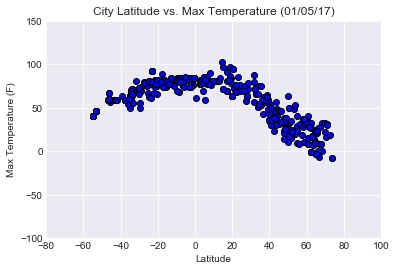

In [51]:
import seaborn as sns
sns.set_style('darkgrid')

# City Latitude vs. Humidity (04/03/18)
plt.title("City Latitude vs. Max Temperature (04/03/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.ylim(-100,150)
plt.xlim (-80,100)

lat = city_pd1["Latitude"]
max_temp = city_pd1["Temperature"]

plt.scatter(lat, max_temp, marker="o", facecolors="blue", edgecolors="black")

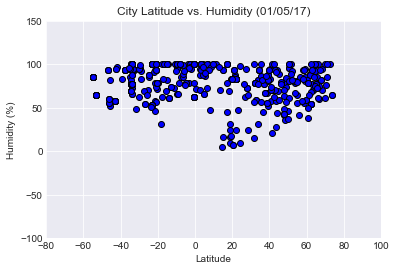

In [52]:
# City Latitude vs. Humidity (04/03/18)
plt.title("City Latitude vs. Humidity (04/03/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.ylim(-100,150)
plt.xlim (-80,100)

lat = city_pd1["Latitude"]
max_temp = city_pd1["Humidity"]

plt.scatter(lat, max_temp, marker="o", facecolors="blue", edgecolors="black")

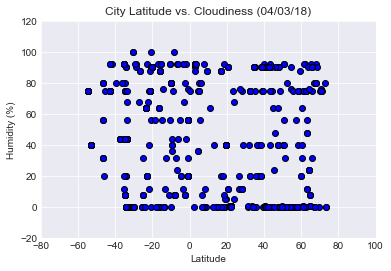

In [55]:
# City Latitude vs. Cloudiness (04/03/18)
plt.title("City Latitude vs. Cloudiness (04/03/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.ylim(-20,120)
plt.xlim (-80,100)

lat = city_pd1["Latitude"]
max_temp = city_pd1["Cloudiness"]

plt.scatter(lat, max_temp, marker="o", facecolors="blue", edgecolors="black")